In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Get the data

In [1]:
import sys
import sklearn
import keras
import numpy as np
print('Version informations:')
print(f'Python: {sys.version}')
print(f'Scikit learn: {sklearn.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Keras: {keras.__version__}')

Version informations:
Python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Scikit learn: 1.3.2
Numpy: 1.26.4
Keras: 3.4.1


In [5]:
BASE_PATH = ''

In [ ]:
import os
if len(BASE_PATH) > 0 and not os.path.exists(BASE_PATH):
    raise Exception('Data folder did not exist!')


In [20]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.array(X_train)/255.0
y_train = np.array(y_train)
X_test = np.array(X_test)/255.0
y_test = np.array(y_test)

# Data augmentation

We want more information, not less.

In [ ]:
from scipy.ndimage import shift
def shift_image(image, dx, dy):
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image

In [ ]:
X_train_aug = [image for image in X_train]
y_train_aug = [label for label in y_train]

for dx, dy in [(-1, 0), (1, 0), (0, 1), (0, -1)]:
    for image, label in zip(X_train, y_train):
        X_train_aug.append(shift_image(image, dx, dy))
        y_train_aug.append(label)

In [ ]:
X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

# KNN

A simple machine learning model that perform reasonably well.

In [ ]:
# Zero training time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_clf.fit(np.reshape(X_train_aug, (-1, 784)), y_train_aug)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
Y_pred = knn_clf.predict(np.reshape(X_test, (-1, 784)))
print(f'Accuracy: {accuracy_score(Y_pred, y_test):.3f}')

Accuracy: 0.976


# CNN

In [ ]:
def reshape(X):
  X = np.array(X)
  try:
    _, token_size, vector_size = model.layers[0].input_shape
    reshape = True
  except:
    try:
      _, token_size, vector_size = model.layers[0].input_shape[0]
      reshape = True
    except:
      reshape = False
  if reshape:
    X = np.reshape(X, (X.shape[0], token_size, vector_size))
  return X

In [ ]:
from keras.saving import load_model
model = load_model(BASE_PATH + 'CNN.keras')

In [21]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters=4, kernel_size=(5, 5),activation='relu', input_shape=(28, 28, 1)))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=4, kernel_size=(7, 7),activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 4)           │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 4)             │             788 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 3, 3, 4)             │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,262 (4.93 KB)

 Trainable params: 1,262 (4.93 KB)

 Non-trainable params: 0 (0.00 B)

Random clicks.

In [32]:
model.fit(X_train, y_train, epochs=1, batch_size = 1)

60000/60000 ━━━━━━━━━━━━━━━━━━━━ 106s 2ms/step - acc: 0.9731 - loss: 0.0861


In [23]:
model.fit(X_train, y_train, epochs=1, batch_size = 8)

7500/7500 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - acc: 0.9675 - loss: 0.1062


In [49]:
model.fit(X_train, y_train, epochs=1, batch_size = 64)

938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - acc: 0.9771 - loss: 0.0712


In [25]:
model.fit(X_train, y_train, epochs=1, batch_size = 512)

118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 154ms/step - acc: 0.9749 - loss: 0.0839


In [34]:
model.fit(X_train, y_train, epochs=1, batch_size = 4096)

15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - acc: 0.9737 - loss: 0.0850


In [51]:
from sklearn.metrics import accuracy_score
Y_pred = np.argmax(model.predict(reshape(X_test), verbose=0), axis=-1)
print(f'Accuracy: {accuracy_score(Y_pred, y_test):.3f}')

Accuracy: 0.980


In [52]:
model.save(BASE_PATH + 'CNN.keras')

# Pipeline

In [36]:
import cv2
from matplotlib import pyplot as plt

def reshape(X):
  X = np.array(X)
  try:
    _, token_size, vector_size = model.layers[0].input_shape
    reshape = True
  except:
    try:
      _, token_size, vector_size = model.layers[0].input_shape[0]
      reshape = True
    except:
      reshape = False
  if reshape:
    X = np.reshape(X, (X.shape[0], token_size, vector_size))
  return X

class DigitClassifier:
  def __init__(self, model, thres=100, dilation=3): # Keras models only
    self.model = model
    self.thres = thres
    self.dilation = dilation

  def inference(self, image, verbose=False):
    conv_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, conv_image = cv2.threshold(conv_image, self.thres, 255, cv2.THRESH_BINARY_INV)
    conv_image = cv2.dilate(conv_image, np.ones((3, 3)), iterations = self.dilation)
    contours, _ = cv2.findContours(conv_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    digits = []
    for c in contours:
      x, y, w, h = cv2.boundingRect(c)
      if w + h <= 56:
        continue
      if verbose:
        cv2.rectangle(image, (x, y), (x + w, y + h), color=(0, 255, 0), thickness = 2)
      digit = conv_image[y:y + h, x:x + w]
      if w <= h: # h' = 20, w'/h' = w/h
       digit = cv2.resize(digit, (w*20//h, 20))
      elif w > h: # w' = 20, w'/h' = w/h
        digit = cv2.resize(digit, (20, 20*h//w))
      w0 = 28 - digit.shape[0]
      h0 = 28 - digit.shape[1]
      if(w0 % 2 == 1):
        w01 = w0//2 - 1
      else:
        w01 = w0//2
      if(h0 % 2 == 1):
        h01 = h0//2 - 1
      else:
        h01 = h0//2
      w02 = w0 - w01
      h02 = h0 - h01
      digit = np.pad(digit, ((w01, w02), (h01, h02)), "constant", constant_values=0)
      if verbose:
        plt.imshow(digit, cmap='gray')
        plt.show()
      digits.append(digit)
    if verbose:
      plt.imshow(image, cmap='gray')
      plt.show()
    digits = np.array(digits)/255.0
    if(len(digits) > 0):
      predictions = np.argmax(model.predict(reshape(digits), verbose=0), axis=-1)
    else:
      predictions = []
    return predictions

# Inference

In [29]:
from keras.saving import load_model
model = load_model(BASE_PATH + 'CNN.keras')

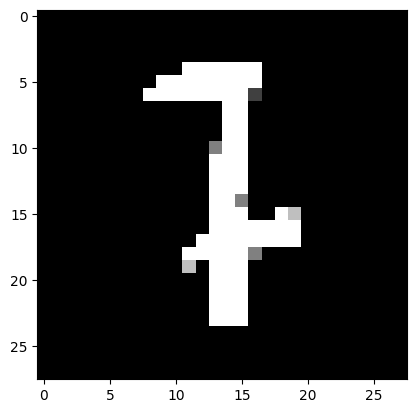

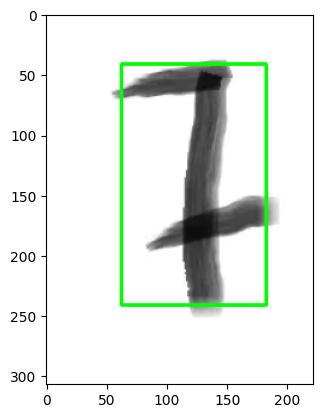

[1]


In [55]:
image = cv2.imread('7.png')
classifier = DigitClassifier(model)
print(classifier.inference(image, verbose=True))